<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Nabilah_Syarifa_Zuhdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identitas Diri**

*   Nama: Nabilah Syarifa Zuhdi
*   NIM: 185150400111013
*   Kelas: Sistem Informasi - B
*   Mata Kuliah: Pengantar Data Saintis


# **Deskripsi Tujuan Bisnis**

Netflix adalah salah satu platform yang menyediakan layanan media streaming digital, seperti film dan TV series. Setiap film atau TV series memiliki detail informasi. Detail informasi tersebut dapat berupa id, tipe video, judul, asal negara, dan lainnya. Pada kasus ini, data tersebut diolah untuk diketahui beberapa informasi menarik dari Netflix. Terutama informasi mengenai rating film dan tv show yang ada pada Netflix serta pengklasifikasiannya.

# **Analisa Pendekatan**

Pendekatan yang dilakukan adalah proses data saintis. Dimana data akan ditetapkan terlebih dahulu tujuan bisnisnya, kemudian dikumpulkan untuk dipersiapkan dengan melakukan _data cleansing_ dan lainnya, lalu data dieksplorasi dengan dibuat visualisasi datanya, setelah itu melakukan pemodelan data, dan yang terakhir model data tersebut akan di evaluasi.  Seluruh rangkaian proses data saintis akan dijalankan pada Google Colab.

# **Pengumpulan Data**

Data yang akan diolah diperoleh dari notebook yang berada pada situs Kaggle. Data tersebut merupakan dataset dari Netflix. Data Netflix diperoleh dari notebook daring yang kemudian diunduh dan dipublikasikan di github. Tautan dari github disematkan pada proses eksplorasi untuk mengolah data-data tersebut menjadi informasi. Format file data tersebut adalah csv atau berbentuk tabel.

# **Pemahaman pada Data**

Data yang diperoleh berisi detail informasi dari film yang berada pada situs Netflix pada tahun 2019. Dataset ini diambil dari Flixable yang merupakan pihak ketiga dari mesin pencarian Netflix. Dataset berjumlah 6234 baris dengan 12 kolom. 

# **Persiapan Data**

Hal yang pertama dilakukan adalah mengimpor library dasar yang dibutuhkan.

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

Kemudian memuat dan membaca data yang nantinya akan ditampilkan 4 data teratasnya.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nabilasyarifa/dataset/main/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Kemudian berikut adalah tahap penyimpulan jumlah baris dan kolom pada dataset

In [ ]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


Lalu melihat data yang bernilai null atau data kosong yang ada pada dataset tersebut.

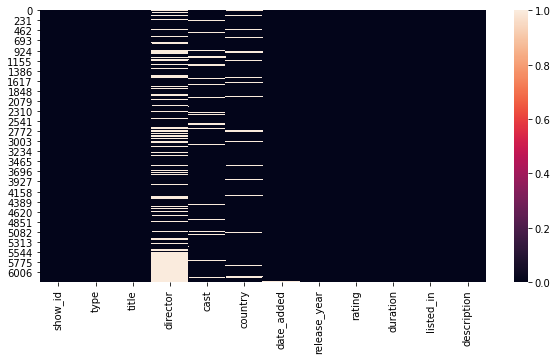

director's null rate :31.58%
cast's null rate :9.14%
country's null rate :7.64%
date_added's null rate :0.18%
rating's null rate :0.16%


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

Dapat diperhatikan bahwa dataset tersebut memiliki data kosong pada bagian director, cast, country, data_added, dan rating. Hal ini dapat dilihat dari warna yang berbeda dan persentase menandakan bahwa terdapat data yang kosong.

Dikarenakan banyaknya data kosong pada kolom director, maka kolom tersebut dihapus. Penghapusan kolom ini diperkirakan tidak akan mempengaruhi data visualisasi.

In [ ]:
df.drop(['director'],axis = 1,inplace = True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Setelah kolom director dihapus, maka sekarang hanya terdapat 11 kolom. Kolom diatas merupakan data teratas dari dataset tersebut.

In [ ]:
df.tail()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


Setelah menghapus kolom director yang memiliki banyak data kosong, maka sekarang menangani data kosong pada kolom cast dan country karena kolom tersebut memiliki banyak data kosong setelah kolom director. 
Penanganan ini dilakukan dengan cara mengganti kekosongan data pada kolom cast dengan mengisi "United States". Hal ini dikarenakan Netflix berasal dari Amerika.
Kemudian mengganti data kosong pada kolom cast dengan "No Data".

In [ ]:
df['country'].replace(np.nan, 'United States',inplace  = True)

df['cast'].replace(np.nan, 'No Data',inplace  = True)

print(colored(
"Drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".
    format(df.isnull().sum().sum()),attrs=['bold']))

Drop the missing rows from the columns 'date_added' and 'rating' since these have only 21 missing rows in total.


Setelah mengganti data kosong pada kolom country dan cast. Langkah selanjutnya yang dilakukan adalah menghapus baris kosong yang terdapat pada kolom data_added dan rating karena penghapusan baris ini berdasarkan pertimbangan bahwa data berjumlah banyak dan data kosong hanya sedikit. Sehingga penghapusan baris ini tidak mempengaruhi visualisasi data.

In [ ]:
df.dropna(inplace=True)

print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(
    df.shape[0],df.shape[1]),attrs=['bold']))

There are 6214 rows and 11 columns after handling the missing records in the dataset.


Selanjutnya yang akan dilakukan adalah melihat tipe data pada setiap kolom dan memisahkan data pada kolom date_added yang tersebar pada 3 kolom yaitu month_added, month_name_added, dan year_added. Pemisahan ini dilakukan untuk kebutuhan pengolahan data.

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,September,2018
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,September,2018
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,September,2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6214 non-null   int64         
 1   type              6214 non-null   object        
 2   title             6214 non-null   object        
 3   cast              6214 non-null   object        
 4   country           6214 non-null   object        
 5   date_added        6214 non-null   datetime64[ns]
 6   release_year      6214 non-null   int64         
 7   rating            6214 non-null   object        
 8   duration          6214 non-null   object        
 9   listed_in         6214 non-null   object        
 10  description       6214 non-null   object        
 11  month_added       6214 non-null   int64         
 12  month_name_added  6214 non-null   object        
 13  year_added        6214 non-null   int64         
dtypes: datetime64[ns](1), in

# **Eksplorasi Data**

**Pada bagian ini, dengan menggunakan diagram lingkaran akan diketahui visualisasi data dari persebaran rating pada film yang ada di Netflix.**

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tvshow =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA', 'R', 'TV-MA']

In [ ]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tvshow_rating = df_tv['rating'].value_counts()[rating_order_tvshow].fillna(0)

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d4d4d4", width=0.6, edgecolor='black')

    color =  ['pink',  'violet',  'olive',  'brown']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

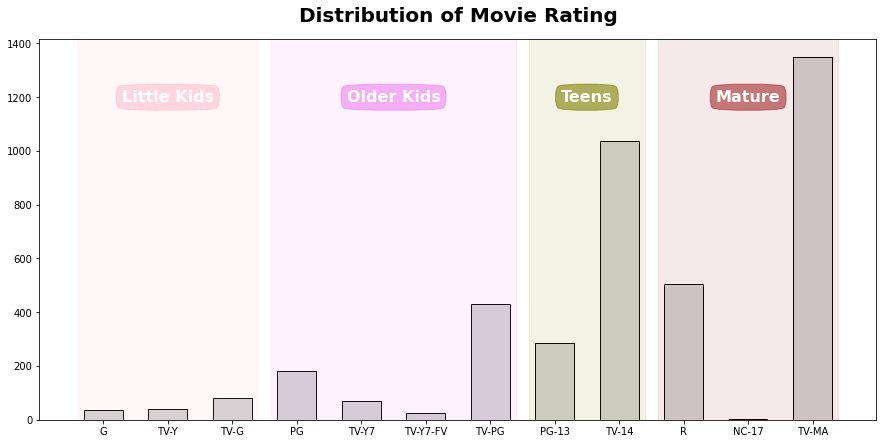

In [ ]:
rating_barplot(movie_rating,'Movie', 1200)

Dapat dilihat dari gambar diagram batang diatas bahwa persebaran rating dari film yang ada di Netflix lebih banyak pada rating Dewasa atau Mature.

**Pada bagian ini, dengan menggunakan diagram lingkaran akan diketahui visualisasi data dari persebaran rating pada TV Show yang ada di Netflix.**

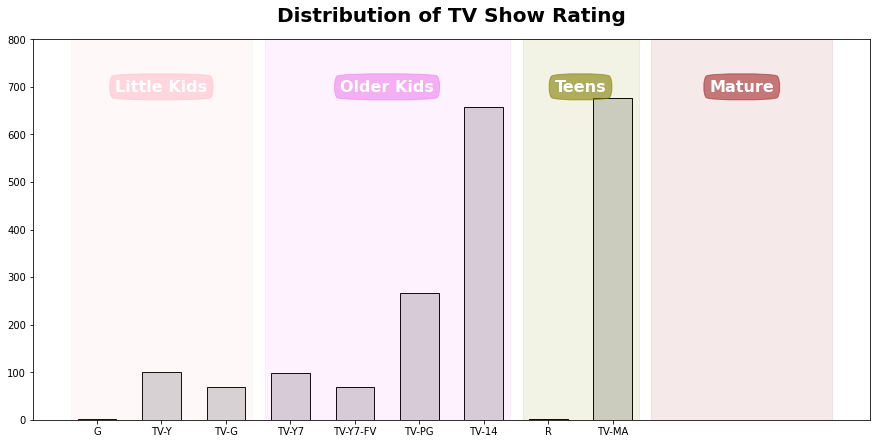

In [ ]:
rating_barplot(tvshow_rating,'TV Show' , 700, 800)

Dapat dilihat dari gambar diagram batang diatas bahwa persebaran rating dari film yang ada di Netflix lebih banyak pada rating Remaja atau Teens.

**Pada bagian ini, dengan menggunakan diagram lingkaran akan diketahui visualisasi data dari tipe konten apa saja yang ada di Netflix.**

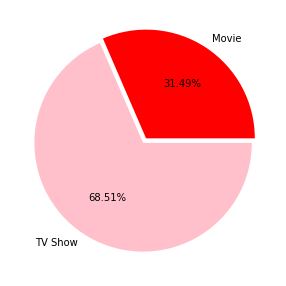

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Red','Pink'])
plt.show()

Terdapat 31,49% tipe konten Movie dan 68,51% tipe konten TV Show pada Netflix. Sehingga dapat disimpulkan bahwa konten TV Show lebih banyak daripada konten Movie.

**Kemudian, dengan menggunakan diagram garis akan diketahui visualisasi data dari pertambahan konten setiap tahunnya**

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="#8b0000"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#008b00"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="#00008b"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Dapat dilihat bahwa pertambahan konten tertinggi berada pada rentang waktu antara 2018 hingga 2019. Pertumbuhan jumlah film atau movies pada Netflix lebih tinggi dibandingkan TV show. 

**Kemudian, dengan menggunakan diagram garis akan diketahui visualisasi data dari pertambahan konten berdasarkan pada setiap bulannya**

In [ ]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#8b0000"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#008b00"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="#00008b"))


data = [t1, t2, t3]

layout = go.Layout(title="Content added over the months", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Dapat dilihat dari diagram garis diatas bahwa pertumbuhan penambahan konten tertinggi pada tiga bulan pertama dan tiga bulan terakhir pada setiap tahunnya. Juga pada bulan Februari mengalami penurunan pertumbuhan dan merupakan bulan dengan penambahan jumlah konten yang paling sedikit.

**Pada bagian ini, dengan menggunakan diagram batang akan diketahui visualisasi data dari 20 negara yang paling sering memproduksi konten pada Netflix.**

In [ ]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

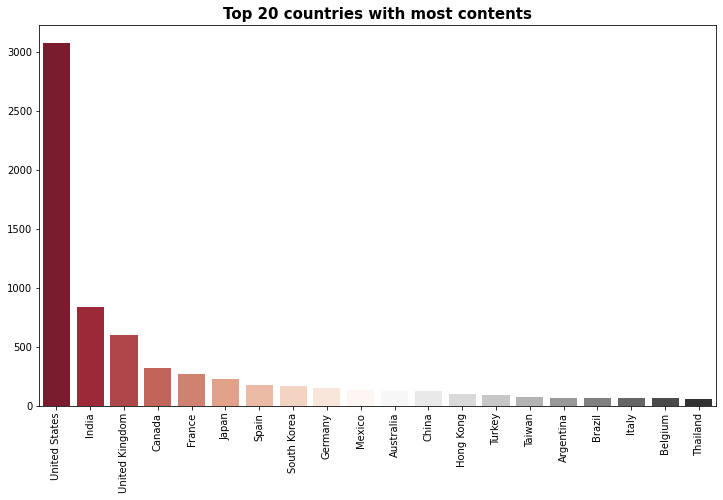

In [ ]:
top20country = country_count.head(20)

from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20country.index, top20country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')

plt.show()

Dapat dilihat dari diagram berikut bahwa United States atau Amerika merupakan negara dengan tingkat produksi yang paling tinggi. Negara dengan tingkat produksi film di Netflix yang paling rendah yaitu Thailand.

**Pada bagian ini, dengan menggunakan diagram batang akan diketahui visualisasi data dari 10 genre teratas yang ada pada film di Netflix**

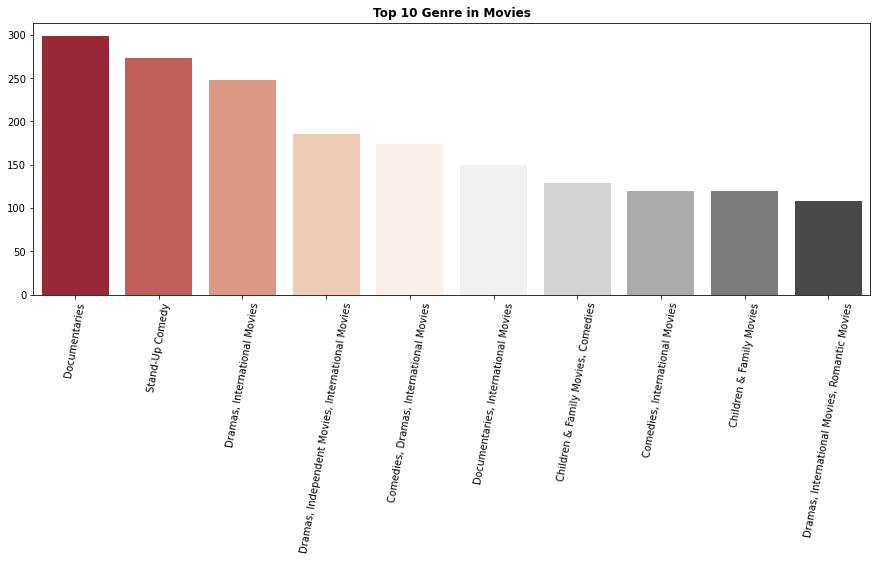

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top 10 Genre in Movies",fontweight="bold")
plt.show()

Dari diagram diatas terlihat bahwa film dengan genre hanya Documentaries memiliki jumlah terbanyak diantara film dengan genre lainnya dengan total hampir mencapai 300 dan pada urutan selanjutnya terdapat film dengan genre hanya Stand-Up Comedy

**Pada bagian ini, dengan menggunakan diagram batang akan diketahui visualisasi data dari 10 genre teratas yang ada pada TV show di Netflix**

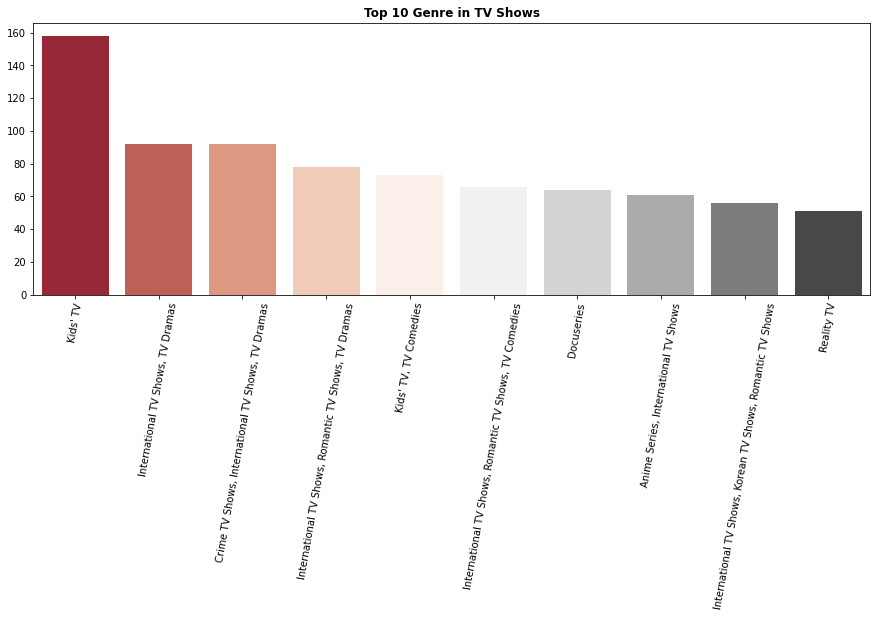

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top 10 Genre in TV Shows",fontweight="bold")
plt.show()

Dari diagram diatas terlihat bahwa TV show dengan genre hanya Kids TV memiliki jumlah terbanyak diantara TV show dengan genre lainnya dengan total hampir mencapai 160 dan pada urutan selanjutnya terdapat film dengan genre Crime TV Shows, International TV Shows, TV Dramas.

**Pada bagian ini, dengan menggunakan heat map untuk mengetahui relasi atau hubungan dari genre yang ada pada film Netflix**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


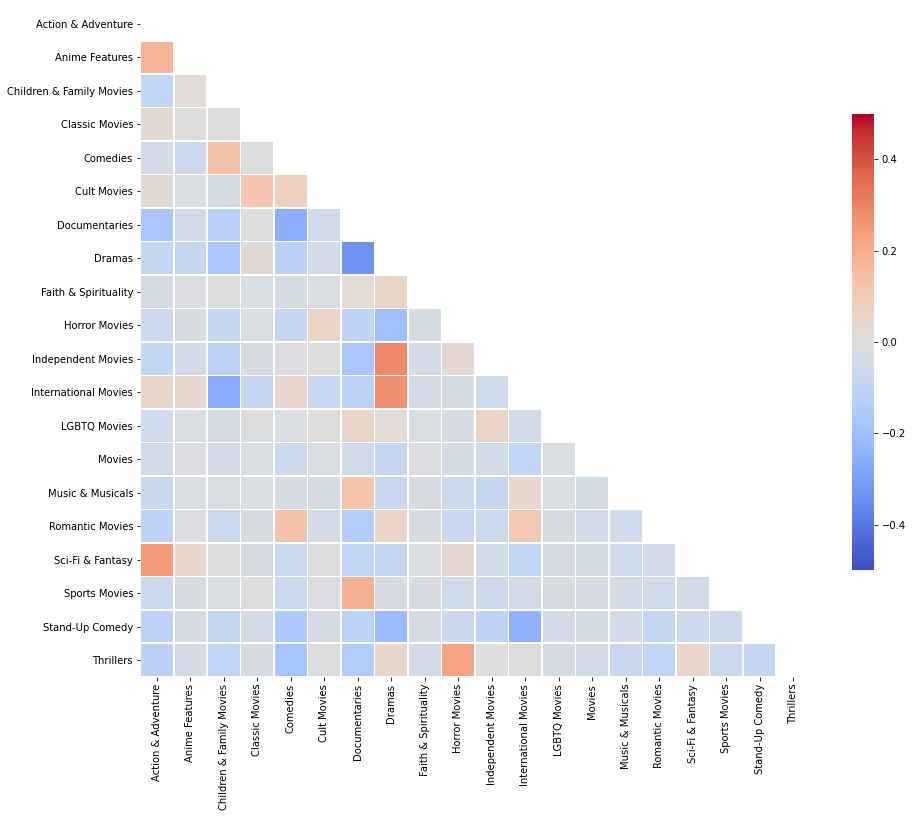

In [ ]:
relation_heatmap(df_movies, 'Movie')

Sesuai dengan heat map di atas, relasi antara genre drama dan documentaries sangat negatif karena berwarna biru, sedangkan relasi yang paling positif ada pada relasi antara genre drama dengan independent movies dan international movies. Semakin mozaik menunjukkan warna merah, maka hubungannya semakin kuat atau positif. Sedangkan apabila mozaik menunjukkan warna biru, maka hubungannya semakin lemah atau negatif.

There are 22 types in the Netflix TV Show Dataset


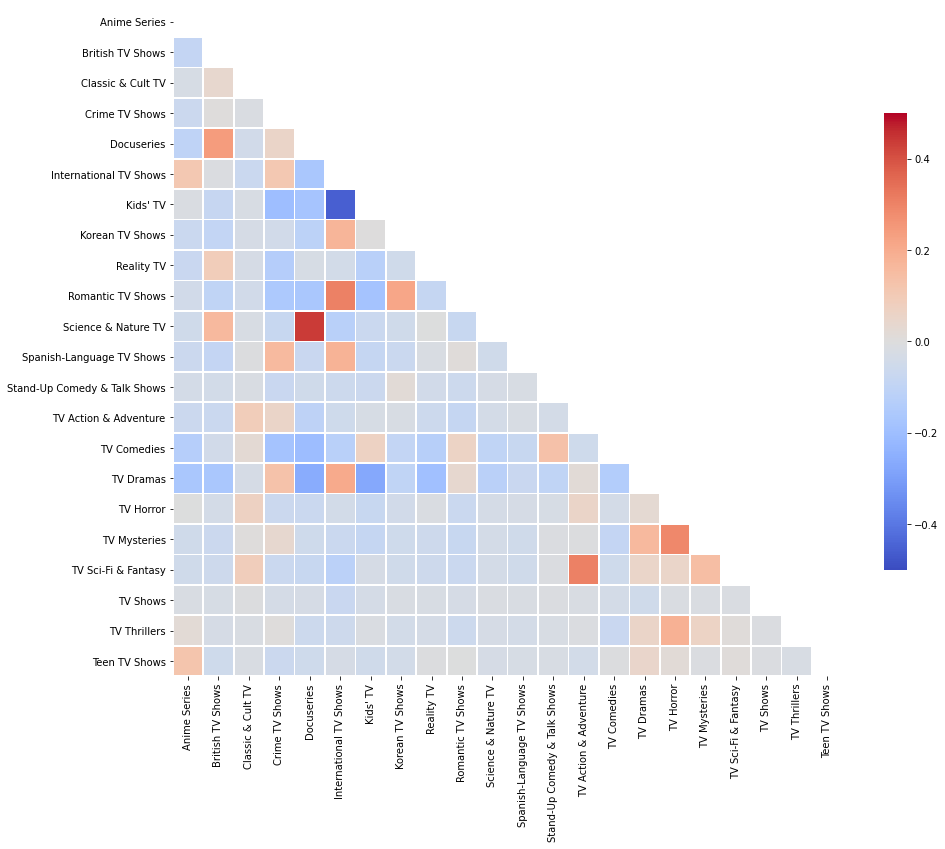

In [ ]:
relation_heatmap(df_tv, 'TV Show')

Sesuai dengan heat map di atas, relasi antara genre science & nature TV dan docuseries sangat positif karena berwarna sangat merah, sedangkan relasi yang paling negatif ada pada relasi antara genre kids tv dengan international tv shows. Semakin mozaik menunjukkan warna merah, maka hubungannya semakin kuat atau positif. Sedangkan apabila mozaik menunjukkan warna biru, maka hubungannya semakin lemah atau negatif.

# **Pemodelan Data**

Pemodelan data pada dataset Netflix ini menggunakan Decision Tree. Dimana decision tree ini suatu metode klasifikasi untuk mengambil sebuah keputusan atau kontrol bersyarat. Pada kasus ini, penulis melakukan preprocessing pada setiap tabelnya agar lebih mudah dalam pengklasifikasian. Hal ini disebabkan apabila tidak dilakukan label encoding, maka data tidak akan bisa diproses karena memiliki string. Sedangkan untuk proses algoritma machine learning hanya dapat menggunakan angka seperti int, float, double, dan lainnya. Penulis membuat pemodelan data berdasarkan rating yang diperoleh dari masing-masing tv show dan movies.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [ ]:
X = df.iloc[:,:-1]
X

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added
0,5961,0,3582,198,498,70,9,190,110,1899,8,11
1,2357,0,2436,2155,379,67,8,194,420,3513,8,11
2,996,1,5673,3977,443,64,12,0,381,6110,8,11
3,1732,1,5677,5300,443,67,11,0,381,5635,8,11
4,2515,0,4,3736,443,68,6,199,167,5871,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,3079,1,4747,1072,103,68,7,105,391,2779,3,0
6219,3525,1,3882,4544,249,70,12,105,74,1799,3,0
6220,1136,1,2554,1690,51,63,10,105,381,3048,3,0
6221,1799,1,4792,5378,249,67,6,105,347,572,3,0


In [ ]:
y = df['rating']
y

0        9
1        8
2       12
3       11
4        6
        ..
6218     7
6219    12
6220    10
6221     6
6222     8
Name: rating, Length: 6214, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4349, 12) (1865, 12) (4349,) (1865,)


In [ ]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

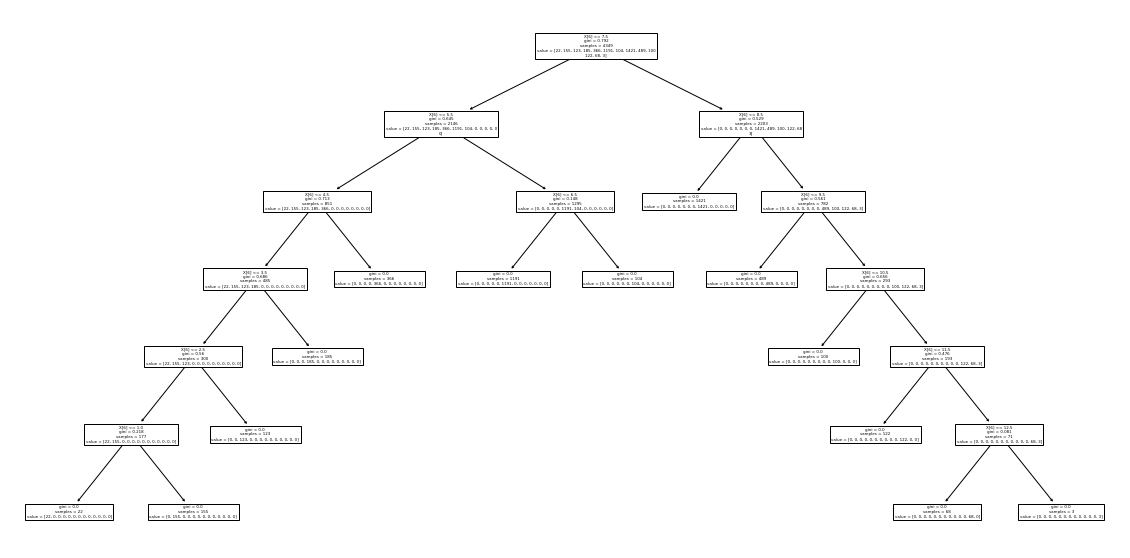

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(classifier_tree);

# **Evaluasi Model**

Setelah membuat permodelan data, maka langkah yang terakhir adalah mengevaluasi model data. Evaluasi model data menggunakan teknik akurasi klasifikasi, precision, recall, dan f1. Keempat teknik tersebut sering dipakai untuk mengevaluasi model data, karena lebih akurat jika menggunakan lebih dari satu teknik.

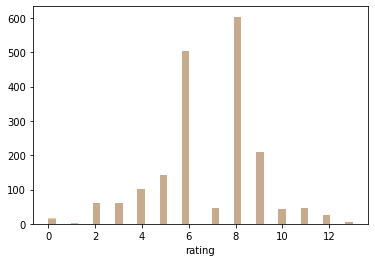

In [ ]:
sns.distplot(y_test, kde = False)
sns.distplot(predict_type, kde = False)

Berikut adalah teknik evaluasi model data dengan menggunakan angka akurasi

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier_tree.predict(X_test)
y_score = classifier_tree.score(X_test, y_test)
print('Accuracy: ', y_score)


Accuracy:  0.9989276139410188


Akurasi bernilai 0.9989276139410188 yang berarti model yang dihasilkan memang baik. Namun akurasi tidak bisa memberikan hasil final, maka harus dilakukan teknik lainnya untuk membuktikan kebaikan model.

Berikut adalah teknik evaluasi model data dengan menggunakan angka precision.

In [ ]:
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

Micro-averaged precision score: 1.00
Macro-averaged precision score: 0.93
Per-class precision score: [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Berikut adalah teknik evaluasi model data dengan menggunakan angka recall

In [ ]:
from sklearn.metrics import recall_score
micro_recall = recall_score(y_pred, y_test, average='micro')
print('Micro recall score: {0:0.2f}'.format(
      micro_recall))

macro_recall = recall_score(y_pred, y_test, average='macro')
print('Macro recall score: {0:0.2f}'.format(
      macro_recall))

per_class_recall = recall_score(y_pred, y_test, average=None)
print('Per-class recall score:', per_class_recall)

Micro recall score: 1.00
Macro recall score: 0.92
Per-class recall score: [0.88235294 0.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


Berikut adalah teknik evaluasi model data dengan menggunakan angka f1.

In [ ]:
from sklearn.metrics import f1_score
micro_f1 = f1_score(y_pred, y_test, average='micro')
print('Micro f1 score: {0:0.2f}'.format(
      micro_f1))

macro_f1 = f1_score(y_pred, y_test, average='macro')
print('Macro f1 score: {0:0.2f}'.format(
      macro_f1))

per_class_f1 = f1_score(y_pred, y_test, average=None)
print('Per-class f1 score:', per_class_f1)

Micro f1 score: 1.00
Macro f1 score: 0.92
Per-class f1 score: [0.9375 0.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.    ]


Untuk menghasilkan nilai f1, dibutuhkan nilai dari precision dan recall. Dari ketiga nilai tersebut dapat disimpulkan bahwa nilai hampir mendekati angka 1 sehingga model pada dataset ini baik.

# **Penutup**

Demikian laporan yang dapat penulis sampaikan. Mohon maaf atas segala kekurangan dan kesalahan yang tertulis pada laporan ini. 